#Topic: WHO Age-standardized Suicide Rates Data Analysis
This is a dataset from the WHO website, which contains age-standardized suicide rates (per 100 000 population) around the world from 2000 to 2019. The data is divided by ‘Location’, ‘Period’, ‘Sex’ and ‘Value’.

With the development of society and economy, contradictions, conflicts, disasters, and the topics of life and death are all inseparable from the discussion in the historical process of human development. In addition to physical health, people's mental health can not be ignored either. 

In my opinion, through the detection, analysis and evaluation of suicide rate data, national departments and organizations can carry out suicide prevention and targeted counseling in areas or groups with high suicide rate, so as to reduce the suicide rate.


Data Source: 
https://www.who.int/data/gho/data/themes/mental-health/suicide-rates 

# Questions:

1) Are suicide rates going up or down globally from 2000 to 2019?

2) Is suicide more common among male or female globally during this period?

3) The top 20 countries with the highest suicide rates?

4) Which continent has the highest suicide rates?

# Python Data Analysis

#1. Preliminary Analysis

In [ ]:
from google.colab import drive
drivePath = '/content/drive'   #please do not change
drive.mount(drivePath)

# Install the library on your environment
!pip install wget


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the library
import wget

# Setup URL and path variables
baseURL = 'https://raw.githubusercontent.com/HardCoreFatLady/WHO-Suicide-Rates/main/'       # github raw file 
doc = 'Suicide Rates1.csv'
fullURL = baseURL + doc

dataPath = drivePath + '/MyDrive/Colab Notebooks/data'

# Download the file
fileName = wget.download(fullURL, out = dataPath)

# Print the file name including the local path
print(fileName)

/content/drive/MyDrive/Colab Notebooks/data/Suicide Rates1 (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

#Load the CSV into a Pandas dataframe
data = pd.read_csv(fileName, encoding='UTF-8')
data.head()

,Indicator,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,DateModified
0,Age-standardized suicide rates (per 100 000 po...,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,True,Sex,Male,MLE,0.00,0.00,0.00,0 [0 - 0],2021-02-08T16:00:00.000Z
1,Age-standardized suicide rates (per 100 000 po...,AMR,Americas,Country,BRB,Barbados,Year,2019,True,Sex,Female,FMLE,0.16,0.11,0.22,0.16 [0.11 - 0.22],2021-02-08T16:00:00.000Z
2,Age-standardized suicide rates (per 100 000 po...,AMR,Americas,Country,BRB,Barbados,Year,2019,True,Sex,Both sexes,BTSX,0.31,0.22,0.42,0.31 [0.22 - 0.42],2021-02-08T16:00:00.000Z
3,Age-standardized suicide rates (per 100 000 po...,AMR,Americas,Country,ATG,Antigua and Barbuda,Year,2019,True,Sex,Both sexes,BTSX,0.32,0.22,0.45,0.32 [0.22 - 0.45],2021-02-08T16:00:00.000Z
4,Age-standardized suicide rates (per 100 000 po...,AMR,Americas,Country,BRB,Barbados,Year,2019,True,Sex,Male,MLE,0.49,0.34,0.65,0.49 [0.34 - 0.65],2021-02-08T16:00:00.000Z


**Examining the attributes of the Data Frame (standard procedures)**

data.shape 

data.columns           (check the variables, like "names" in data)

data.isnull().sum()    (check whether there is null value)

data.info()

data.describe()        (descriptive statistics for numerical variables)

In [ ]:
data.shape

(10980, 17)

In [ ]:
a = data.columns
for i in range(0, len(a)):
  print('Name of Column',i+1,':',a[i])

Name of Column 1 : Indicator
Name of Column 2 : ParentLocationCode
Name of Column 3 : ParentLocation
Name of Column 4 : Location type
Name of Column 5 : SpatialDimValueCode
Name of Column 6 : Location
Name of Column 7 : Period type
Name of Column 8 : Period
Name of Column 9 : IsLatestYear
Name of Column 10 : Dim1 type
Name of Column 11 : Dim1
Name of Column 12 : Dim1ValueCode
Name of Column 13 : FactValueNumeric
Name of Column 14 : FactValueNumericLow
Name of Column 15 : FactValueNumericHigh
Name of Column 16 : Value
Name of Column 17 : DateModified


In [ ]:
data.isnull().sum()

Indicator               0
ParentLocationCode      0
ParentLocation          0
Location type           0
SpatialDimValueCode     0
Location                0
Period type             0
Period                  0
IsLatestYear            0
Dim1 type               0
Dim1                    0
Dim1ValueCode           0
FactValueNumeric        0
FactValueNumericLow     0
FactValueNumericHigh    0
Value                   0
DateModified            0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Indicator             10980 non-null  object 
 1   ParentLocationCode    10980 non-null  object 
 2   ParentLocation        10980 non-null  object 
 3   Location type         10980 non-null  object 
 4   SpatialDimValueCode   10980 non-null  object 
 5   Location              10980 non-null  object 
 6   Period type           10980 non-null  object 
 7   Period                10980 non-null  int64  
 8   IsLatestYear          10980 non-null  bool   
 9   Dim1 type             10980 non-null  object 
 10  Dim1                  10980 non-null  object 
 11  Dim1ValueCode         10980 non-null  object 
 12  FactValueNumeric      10980 non-null  float64
 13  FactValueNumericLow   10980 non-null  float64
 14  FactValueNumericHigh  10980 non-null  float64
 15  Value              

In [ ]:
data.describe()

,Period,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh
count,10980.000000,10980.000000,10980.000000,10980.000000
mean,2009.500000,11.960951,8.175477,17.388002
std,5.766544,12.812487,8.324872,20.038127
min,2000.000000,0.000000,0.000000,0.000000
25%,2004.750000,4.630000,3.060000,6.510000
50%,2009.500000,8.270000,5.450000,12.030000
75%,2014.250000,14.940000,10.622500,21.200000
max,2019.000000,195.200000,86.390000,343.200000


In [ ]:
data[data.FactValueNumeric == max(data.FactValueNumeric)]

,Indicator,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,DateModified
2932,Age-standardized suicide rates (per 100 000 po...,AFR,Africa,Country,LSO,Lesotho,Year,2014,False,Sex,Male,MLE,195.2,70.98,343.2,195.2 [70.98 - 343.2],2021-02-08T16:00:00.000Z


#2. Results & Visualization

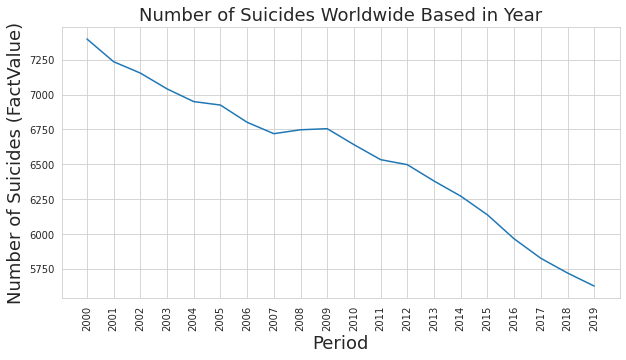

In [ ]:
data_year = data.groupby("Period").sum().sort_values(by='FactValueNumeric')[['FactValueNumeric']]
data_year = data_year.sort_index()
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(data_year)), data_year.FactValueNumeric)
plt.xticks(np.arange(len(data_year)), (data_year.index),rotation=90)
plt.xlabel('Period',fontsize=18)
plt.ylabel('Number of Suicides (FactValue)',fontsize=18)
plt.title("Number of Suicides Worldwide Based in Year",fontsize=18)
plt.show()   # selecting the suicide rates value and plot one single line.

Text(0.5, 1.0, 'Number of Suicides Worldwide')

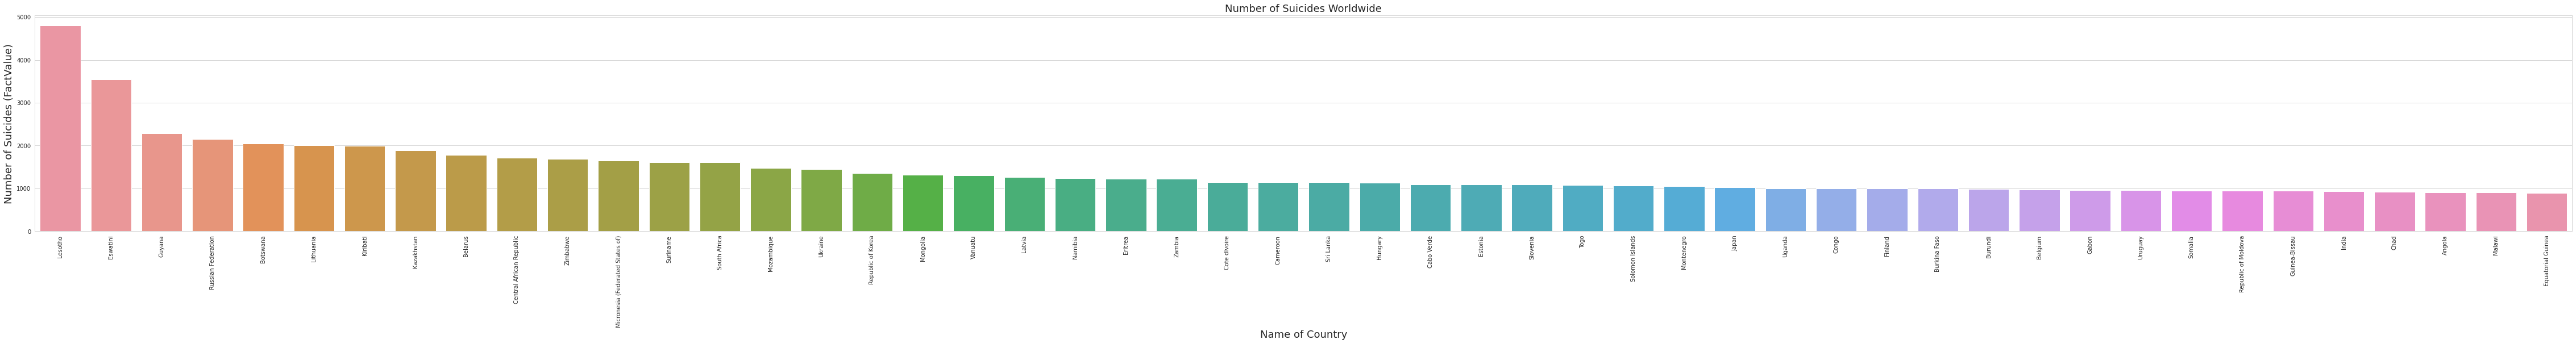

In [ ]:
country_suicides = pd.DataFrame(data.groupby("Location")["FactValueNumeric"].sum())
country_suicides['Location'] = country_suicides.index
country_suicides = country_suicides.reset_index(drop = True)

sorted_data = country_suicides.sort_values("FactValueNumeric", ascending=False)
sorted_data = sorted_data.iloc[:50,:]

plt.figure(figsize=(80,7))
sns.barplot(x=sorted_data.Location, y=sorted_data.FactValueNumeric)
plt.xticks(rotation= 90)
plt.xlabel('Name of Country',fontsize=18)
plt.ylabel('Number of Suicides (FactValue)',fontsize=18)
plt.title('Number of Suicides Worldwide',fontsize=18)

Text(0.5, 1.0, 'Is suicide more common among male or female globally?')

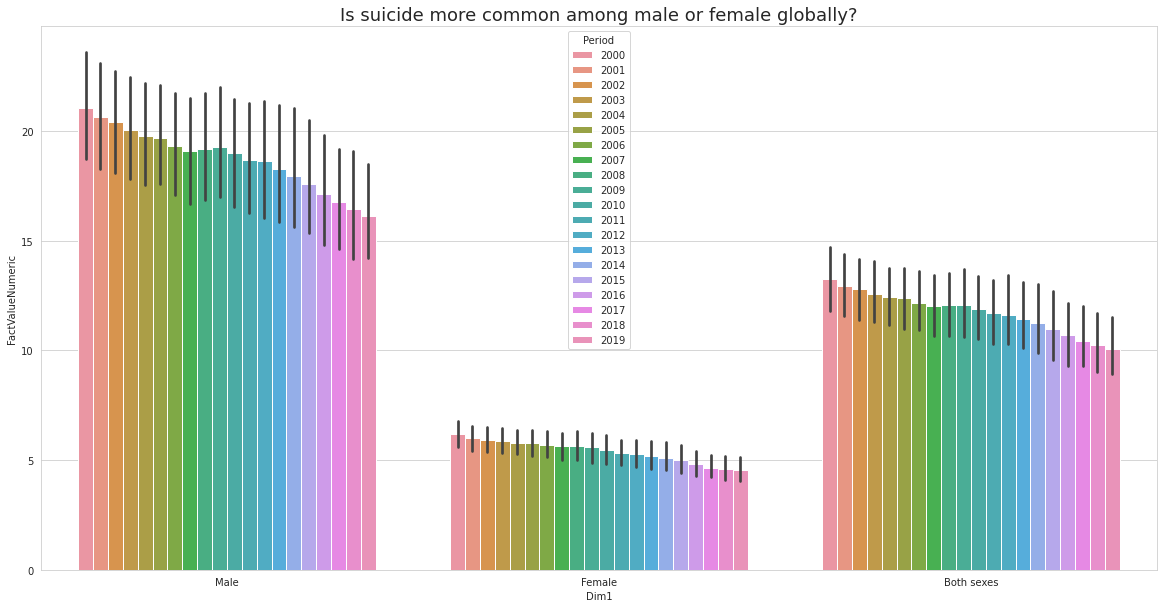

In [ ]:
plt.figure(figsize=(20,10))
bar_sex = sns.barplot(x = 'Dim1', y = 'FactValueNumeric', hue = 'Period', data = data)
bar_sex.set_title('Is suicide more common among male or female globally?',fontsize=18)

93                              Lesotho
55                             Eswatini
70                               Guyana
134                  Russian Federation
21                             Botswana
96                            Lithuania
87                             Kiribati
85                           Kazakhstan
14                              Belarus
31             Central African Republic
182                            Zimbabwe
107    Micronesia (Federated States of)
155                            Suriname
150                        South Africa
111                          Mozambique
170                             Ukraine
131                   Republic of Korea
108                            Mongolia
177                             Vanuatu
91                               Latvia
Name: Location, dtype: object


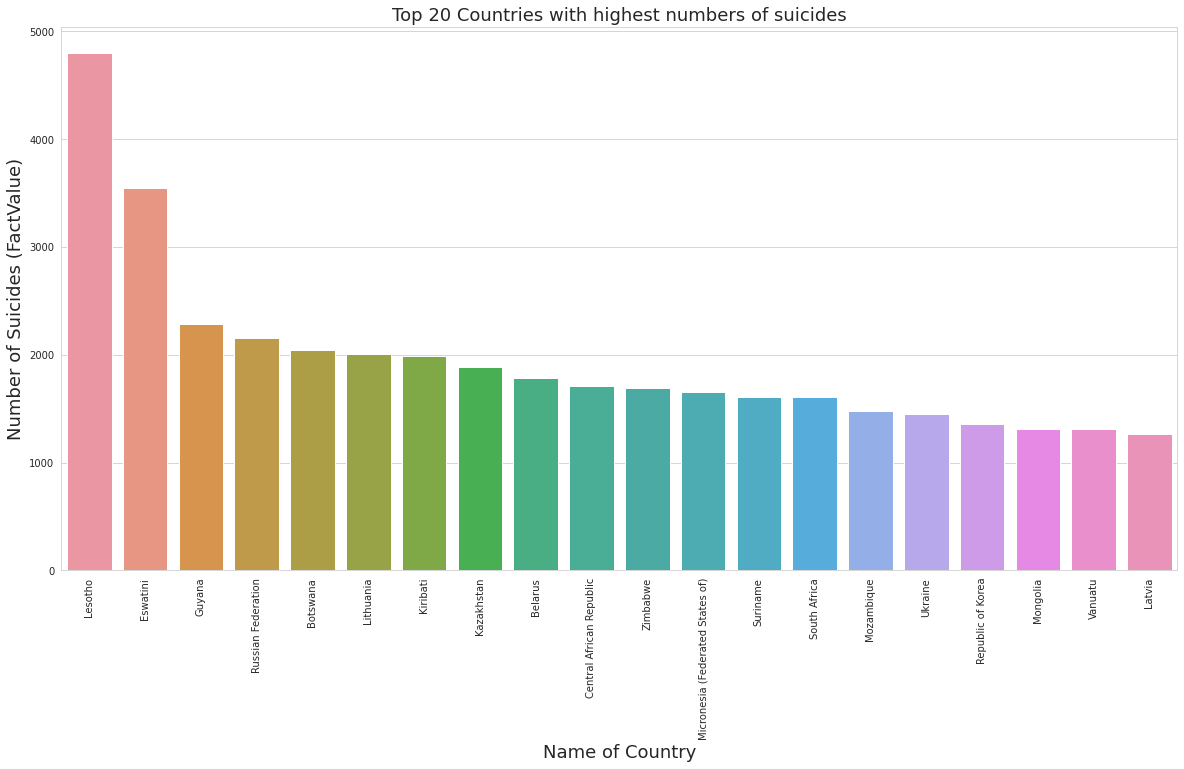

In [ ]:
data_rank = pd.DataFrame(data.groupby(['Location'])['FactValueNumeric'].sum().reset_index())
data_rank.sort_values(by=['FactValueNumeric'],ascending=False,inplace=True)

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)

T20=sns.barplot(x=data_rank["Location"].head(20), y= data_rank['FactValueNumeric'].head(20), data=data_rank)
T20.set_xlabel("Name of Country",fontsize=18)
T20.set_ylabel("Number of Suicides (FactValue)",fontsize=18)
T20.set_title('Top 20 Countries with highest numbers of suicides',fontsize=18)
for item in T20.get_xticklabels():
    item.set_rotation(90)


data_rank.sort_values(by=['FactValueNumeric'],ascending=False,inplace=True)
x=data_rank["Location"].head(20)
print(x)       # print top 20 countries' name

In [ ]:
continents = data.groupby('ParentLocation').size()
print(continents.index)
numContinents = len(continents)
print('num of continents:',numContinents)   # print the numbers of continents showed in the data

Index(['Africa', 'Americas', 'Eastern Mediterranean', 'Europe',
       'South-East Asia', 'Western Pacific'],
      dtype='object', name='ParentLocation')
num of continents: 6


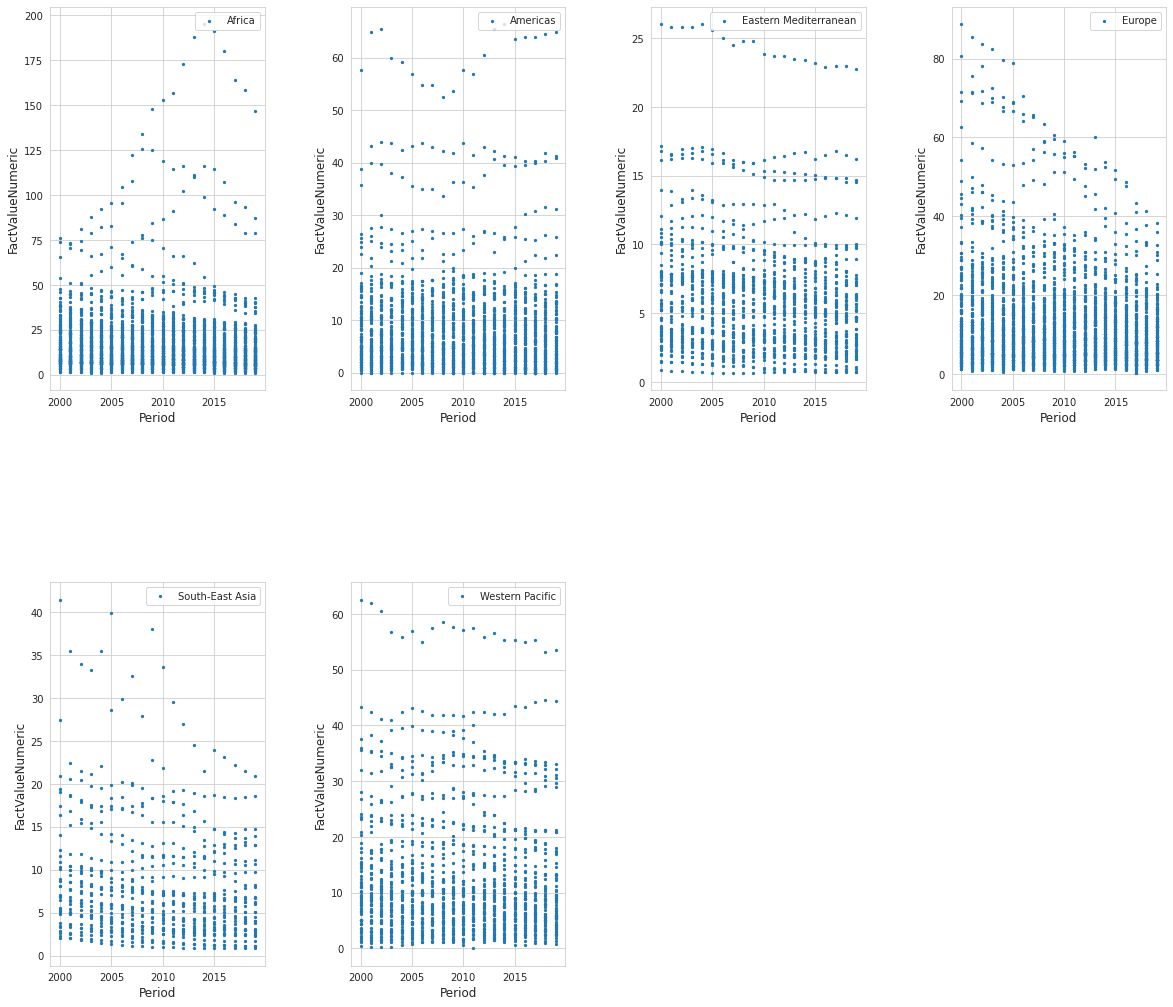

In [ ]:
fig = plt.figure(figsize=(20,60)) 
fig.subplots_adjust(hspace=0.5, wspace = 0.4)
n = 1

for continent in continents.index:
    ax = fig.add_subplot(numContinents,4,n) 
    x = data[data['ParentLocation'] == continent]['Period']
    y = data[data['ParentLocation'] == continent]['FactValueNumeric']
    ax.scatter(x,y,s=5)
    ax.set_xlabel('Period',fontsize=12)
    ax.set_ylabel('FactValueNumeric',fontsize=12)
    ax.legend([continent],loc = 'upper right') #title
    n = n+1

plt.show()   # Plot different continents' value in multiple graphs

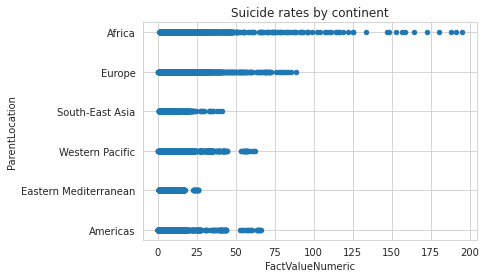

In [ ]:
data.plot(kind = 'scatter', x = 'FactValueNumeric', y = 'ParentLocation', title = 'Suicide rates by continent')
plt.show()   # Plot different continents' value in one graph (to compare with each other)

#3. Conclusion


Answer the questions:


1) Are suicide rates going up or down globally from 2000 to 2019?

    The line chart above shows a downward trend.

2) Is suicide more common among male or female globally during this period?

    It is more common on male.

3) The top 20 countries with the highest suicide rates?

    Lesotho
    Eswatini
    Guyana
    Russian Federation
    Botswana
    Lithuania
    Kiribati
    Kazakhstan
    Belarus
    Central African Republic
    Zimbabwe
    Micronesia (Federated States of)
    Suriname
    South Africa
    Mozambique
    Ukraine
    Republic of Korea
    Mongolia
    Vanuatu
    Latvia

4) Which continent has the highest suicide rates?
 
    Africa
